### Regression models to predict US open price:

c:\Users\johan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Linear Regression - Mean Squared Error: 3.1654793080010935, R^2 Score: 0.99934873937274
Decision Tree Regressor - Mean Squared Error: 6.4689460854101, R^2 Score: 0.9986690894252109
Random Forest Regressor - Mean Squared Error: 3.6021762590694757, R^2 Score: 0.9992588940436121
Gradient Boosting Regressor - Mean Squared Error: 3.573359174509954, R^2 Score: 0.9992648228242926


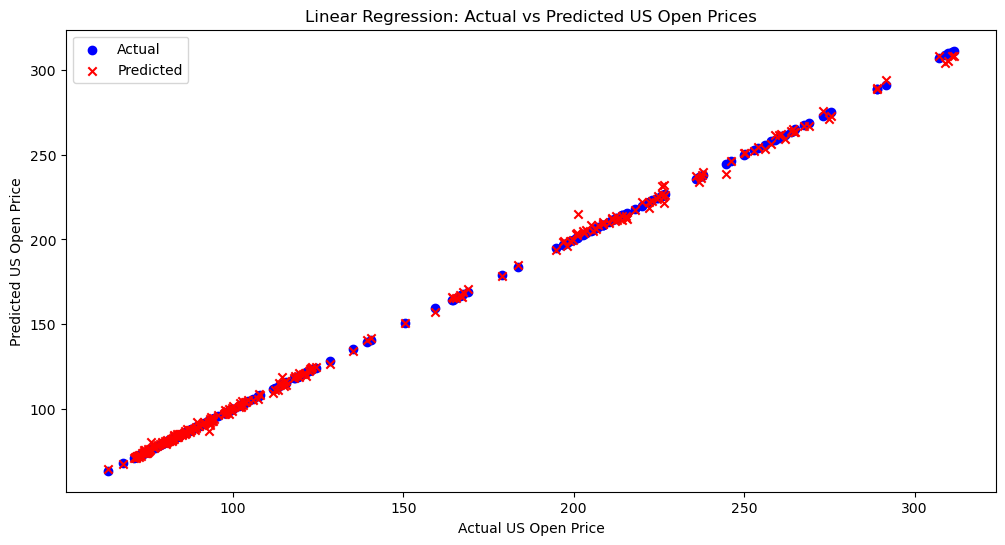

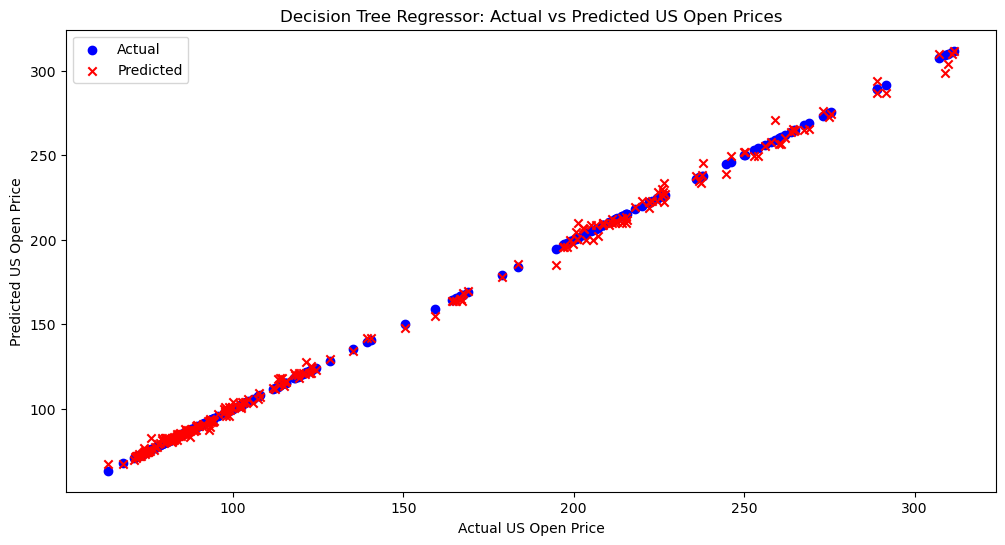

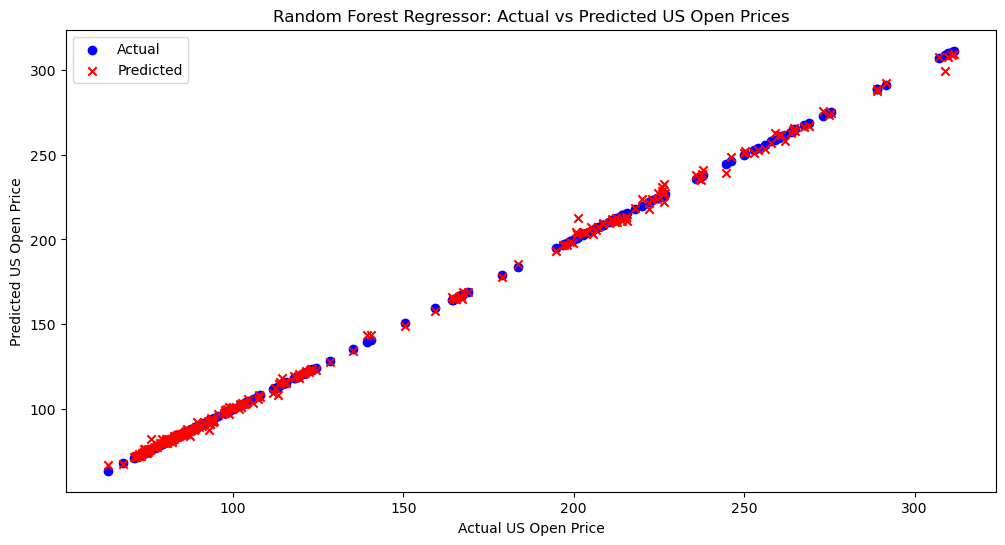

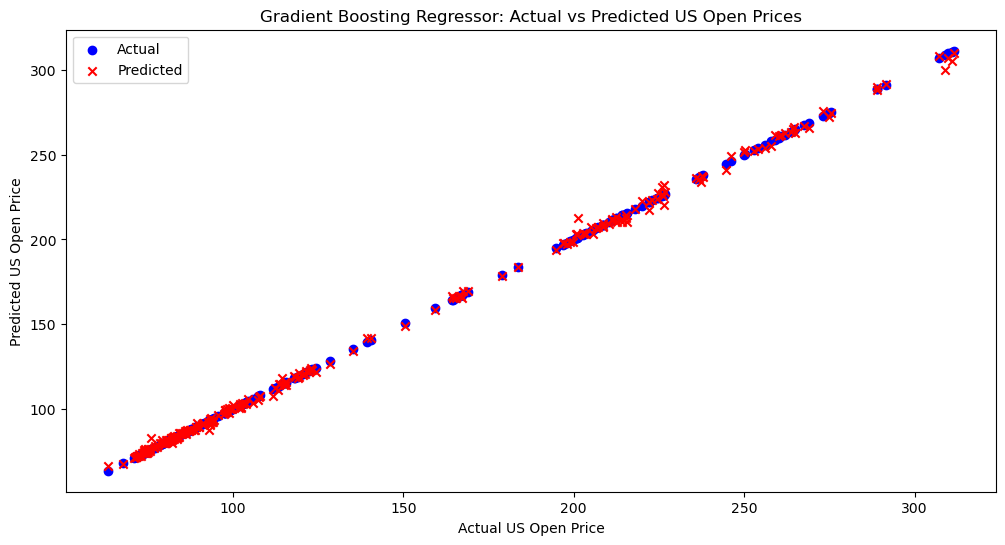

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the CSV file into a DataFrame
df = pd.read_csv('stock_data.csv')

# Machine Learning models to predict US Open Price based on multiple features
# Prepare the data
X = df[['HK_Close', 'US_Close', 'VIX', 'Treasury_Yield', 'RSI_US', 'US_HK_Ratio','US_Volume','HK_Volume', 'US_MA20','HK_MA20']]
y = df['US_Open']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}")
    return y_pred

# Linear Regression
linear_model = LinearRegression()
y_pred_lr = evaluate_model(linear_model, X_train, X_test, y_train, y_test, "Linear Regression")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=45)
y_pred_dt = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree Regressor")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=45)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=45)
y_pred_gb = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")

# Plot actual vs predicted values for each model
models_predictions = {
    "Linear Regression": y_pred_lr,
    "Decision Tree Regressor": y_pred_dt,
    "Random Forest Regressor": y_pred_rf,
    "Gradient Boosting Regressor": y_pred_gb
}

for model_name, y_pred in models_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_test, color='blue', label='Actual', marker='o')
    plt.scatter(y_test, y_pred, color='red', label='Predicted', marker='x')
    plt.xlabel('Actual US Open Price')
    plt.ylabel('Predicted US Open Price')
    plt.title(f"{model_name}: Actual vs Predicted US Open Prices")
    plt.legend()
    plt.show()


### Trading performance for different regression models (using our trading simulator class):

Skipped 1 sell signals due to insufficient positions.

=== Linear Regression Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 102253.74
Portfolio Growth: 2.25%
Total Buys: 7, Total Sells: 4
-----------------------------------



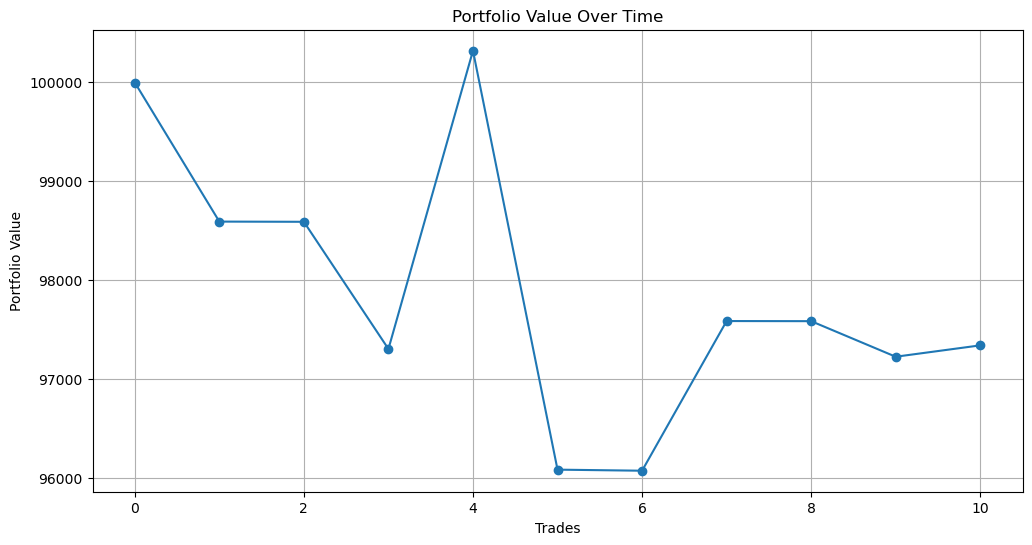

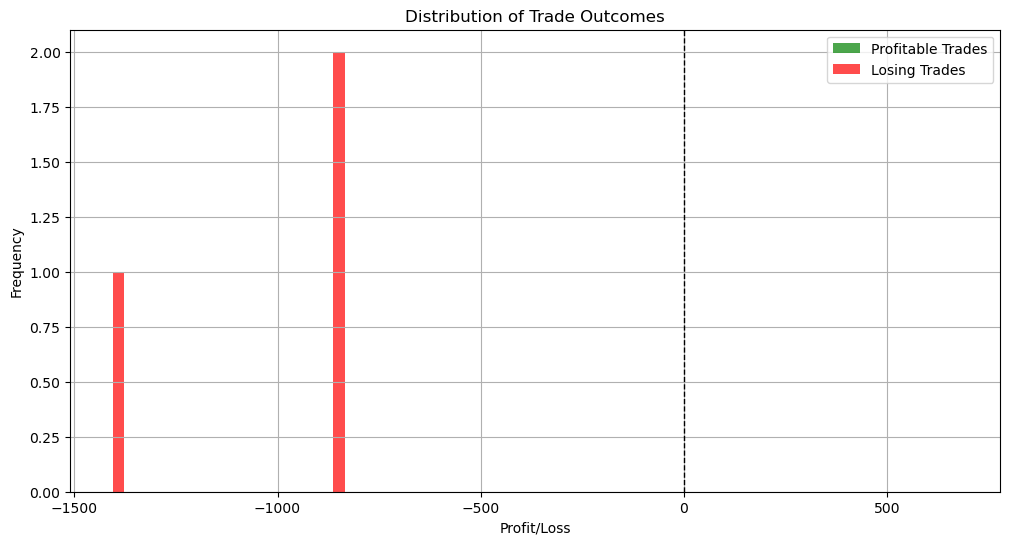


=== Decision Tree Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 112153.26
Portfolio Growth: 12.15%
Total Buys: 25, Total Sells: 19
-----------------------------------



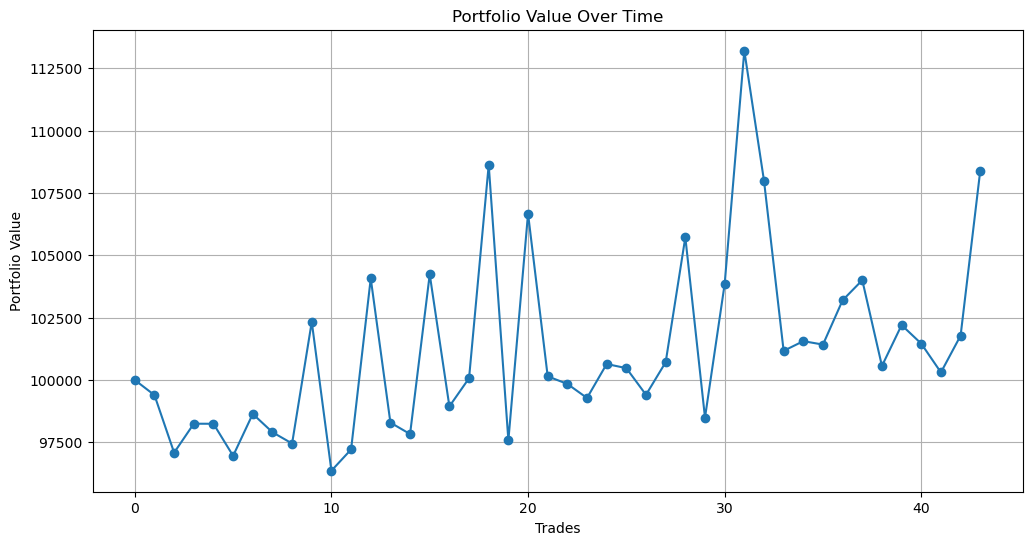

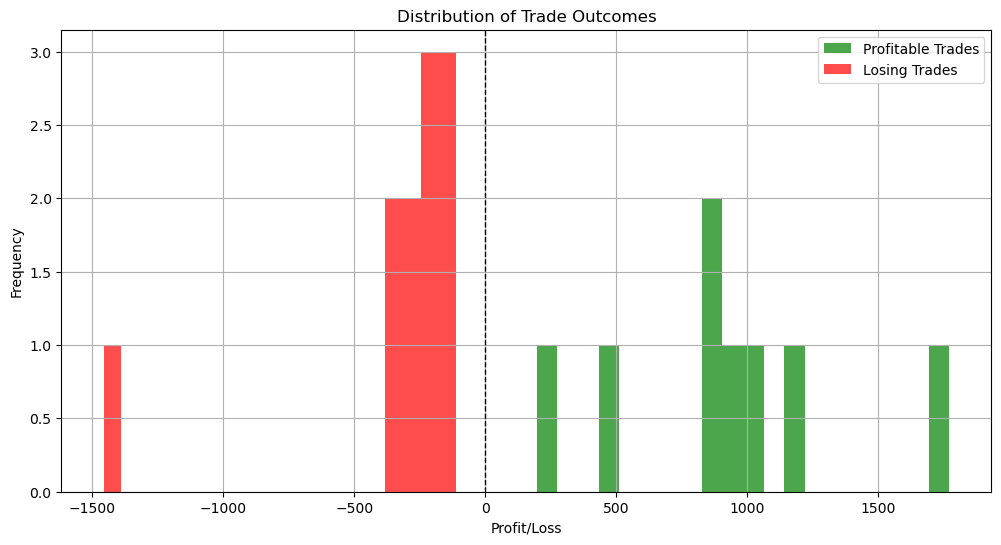

Skipped 1 sell signals due to insufficient positions.

=== Random Forest Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 102093.69
Portfolio Growth: 2.09%
Total Buys: 13, Total Sells: 12
-----------------------------------



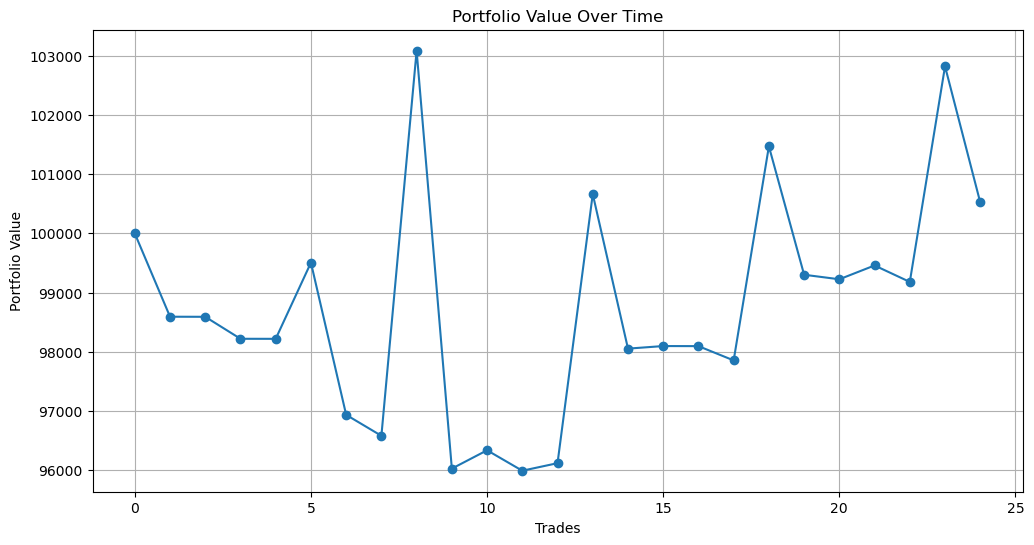

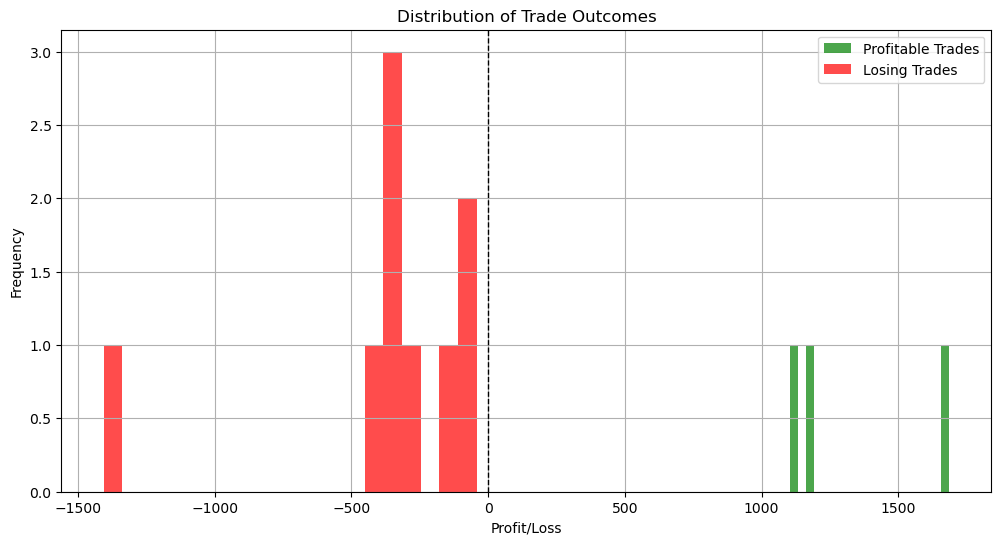

Skipped 3 sell signals due to insufficient positions.

=== Gradient Boosting Regressor Results ===

=== Trading Performance Summary ===
Initial Cash: 100000.00
Final Portfolio Value: 101111.15
Portfolio Growth: 1.11%
Total Buys: 10, Total Sells: 10
-----------------------------------



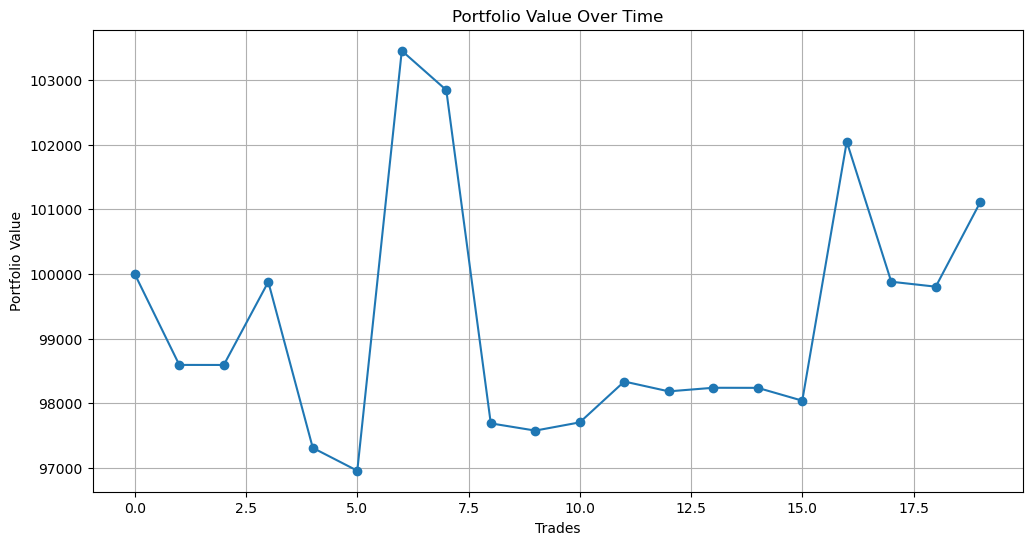

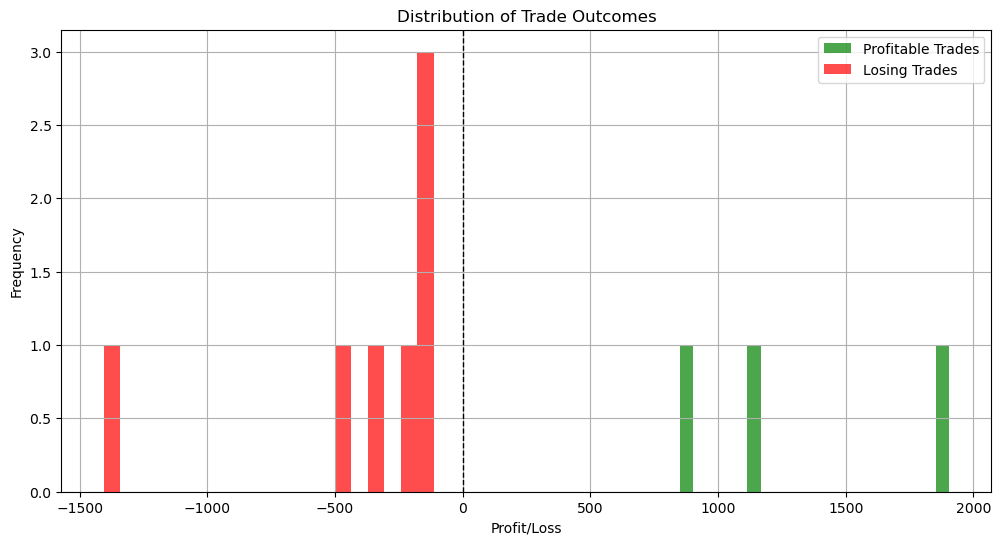

Trade Log for Linear Regression:
  Action       Price  Quantity  Profit/Loss  Portfolio Value
0    BUY  230.570007        10     0.000000     99997.694300
1   SELL   90.050003        10 -1406.100543     98591.593757
2    BUY  205.470001        10     0.000000     98589.539057
3    BUY   76.980003        10     0.000000     97303.869278
4    BUY  227.850006        10     0.000000    100318.990833
5   SELL   86.709999        10  -834.767145     96083.923523
6   SELL   86.209999        10  -839.762145     96073.061423
7   SELL  237.759995        10   674.222310     97586.183777
8    BUY  120.129997        10     0.000000     97584.982477
9    BUY   84.260002        10     0.000000     97225.439926


Trade Log for Decision Tree Regressor:
  Action       Price  Quantity  Profit/Loss  Portfolio Value
0    BUY  265.799988        10     0.000000     99997.342000
1    BUY  205.399994        10     0.000000     99391.288061
2   SELL   90.050003        10 -1456.400378     97083.387744
3   SELL  2

In [ ]:
from TradingSimulator import TradingSimulator
import pandas as pd

# Generate trading signals based on predicted and actual values with a 1% threshold
# Signal: 1 (Buy) if prediction > actual + 1%, -1 (Sell) if prediction < actual - 1%, 0 (Hold)
def generate_signals(y_test, y_pred, threshold=0.01):
    # Convert y_test and y_pred to NumPy arrays if they are not already
    if isinstance(y_test, pd.Series):
        y_test = y_test.to_numpy()
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.to_numpy()

    # Flatten the arrays for easy manipulation
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()
    
    # Create a DataFrame with the actual and predicted values
    signals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    def determine_signal(row):
        actual = row['Actual']
        predicted = row['Predicted']
        
        # Calculate percentage difference
        percent_diff = (predicted - actual) / actual
        
        if percent_diff > threshold:  # If predicted > actual + threshold
            return 1  # Buy
        elif percent_diff < -threshold:  # If predicted < actual - threshold
            return -1  # Sell
        else:
            return 0  # Hold

    signals['signal'] = signals.apply(determine_signal, axis=1)
    return signals

# Test each model with the TradingSimulator
results = {}

for model_name, y_pred in models_predictions.items():
    # Generate signals
    signals = generate_signals(y_test, y_pred)
    
    # Combine signals with test data
    df_test = df.loc[X_test.index].reset_index(drop=True)
    df_test['signal'] = signals['signal']
    
    # Initialize and run the simulator
    simulator = TradingSimulator(initial_cash=100000, transaction_fee=0.001)
    simulator.run(df_test, signal_column='signal', price_column='US_Close')
    
    # Get results and store them
    final_portfolio_value = simulator.get_portfolio_value(df_test['US_Close'].iloc[-1])
    trade_log = simulator.get_trade_log()
    results[model_name] = {
        "Simulator": simulator,  # Store the simulator instance for accessing methods later
        "Final Portfolio Value": final_portfolio_value,
        "Trade Log": trade_log
    }
    
    # Print summary and plot portfolio growth
    print(f"\n=== {model_name} Results ===")
    simulator.summary(df_test['US_Close'].iloc[-1])
    simulator.plot_portfolio_growth()
    simulator.plot_trade_outcomes()
    

# Optional: Display trade logs for each model
for model_name, result in results.items():
    print(f"Trade Log for {model_name}:")
    print(result["Trade Log"].head(10))  # Display the first 10 rows for brevity
    print("\n")
